## ch04-TF2를 사용한 mlflow

<div style="text-align: right"> Initial upload: 2022.04.05 </div>
<div style="text-align: right"> Last update: 2022.04.05</div>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 50

from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

mlflows는 tf 2.0이상 버전과쉽게 통합됨

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.datasets import mnist

import sklearn
from sklearn.metrics import roc_auc_score

In [26]:
import mlflow
import mlflow.tensorflow

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Class:  5


(<matplotlib.image.AxesImage at 0x25899f82910>, None)

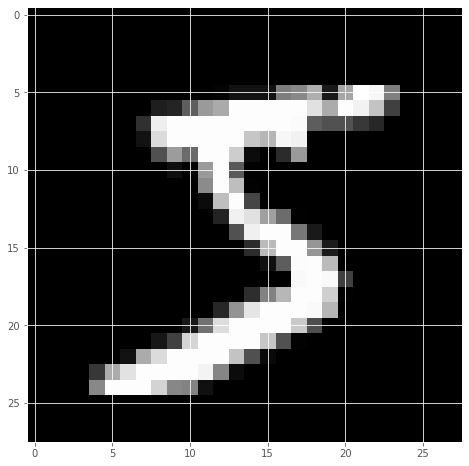

In [29]:
plt.imshow(X_train[0], cmap= 'gray'), print('Class: ', y_train[0])

In [30]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [31]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [32]:
X_train.shape

(60000, 28, 28, 1)

In [33]:
y_train = tf.keras.utils.to_categorical(y_train) # 원핫인코딩
y_test = tf.keras.utils.to_categorical(y_test)

In [34]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


### mlflow 실행

In [36]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size= 3, strides = 2, padding = 'same',
                input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(filters=8, kernel_size= 3, strides = 2, padding = 'same',
                input_shape = (28, 28, 1), activation = 'relu'))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                11790     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 13,940
Trainable params: 13,940
Non-trainable params: 0
____________________________________________________

In [37]:
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

이제 mlflow에 실행을 기록하도록 지시

In [38]:
mlflow.set_experiment('TF_Keras_MNIST')
with mlflow.start_run():
    mlflow.tensorflow.autolog()
    model.fit(X_train, y_train, batch_size=256, epochs=10)
    preds = model.predict(X_test)
    preds = np.round(preds)
    eval_acc = model.evaluate(X_test, y_test)[1]
    auc_score = roc_auc_score(y_test, preds)
    print('eval_acc: ', eval_acc)
    print('auc_score: ', auc_score)
    mlflow.tensorflow.mlflow.log_metric('eval_acc', eval_acc)
    mlflow.tensorflow.mlflow.log_metric('auc_score', auc_score)
mlflow.end_run()

2022/04/14 10:08:33 INFO mlflow.tracking.fluent: Experiment with name 'TF_Keras_MNIST' does not exist. Creating a new experiment.


Epoch 1/10
235/235 [==============================] - 8s 7ms/step - loss: 1.3006 - accuracy: 0.6497
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2614 - accuracy: 0.9201
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1687 - accuracy: 0.9488
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1314 - accuracy: 0.9607
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1079 - accuracy: 0.9680
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0899 - accuracy: 0.9725
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0782 - accuracy: 0.9766
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0680 - accuracy: 0.9786
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0624 - accuracy: 0.9810
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0551 - accuracy: 0.9829